In [54]:
import pandas as pd
import numpy as np
from scipy.stats import randint,pointbiserialr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,roc_curve, auc, precision_score, f1_score,make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Visto o objetivo do problema queremos montar um modelo de classificacao com uma boa taxa de assertividade para a classe pos (apresenta defeitos no sistema de ar) montaremos todo o modelo bucando otimizar o valor do ROC AUC que mede o quao bem o modelo separa a variavel resposta (variavel a ser classificada)

### Tratamentos iniciais

In [40]:
previous_year = pd.read_csv(r"D:\Facul\Dataset for candidates\air_system_previous_years.csv")
present_year =  pd.read_csv(r"D:\Facul\Dataset for candidates\air_system_present_year.csv")

previous_year.replace('na', np.nan, inplace=True)
present_year.replace('na', np.nan, inplace=True)

Irei manter apenas colunas que possuam uma quantidade consideravel de registros preenchidos, isto é, aquelas onde pelo menos 90% dos registros esta preenchido

In [4]:
columns_data = []

# Iterando sobre cada coluna do DataFrame
for col in previous_year.columns:
    # Calculando a porcentagem de valores nulos na coluna atual
    null_percentage = previous_year[col].isnull().sum() / previous_year.shape[0]
    
    # Adicionando os dados da coluna atual à lista
    columns_data.append({'Coluna': col, '% de Valores Nulos': null_percentage})

# Criando um DataFrame a partir da lista de dicionários
columns_df = pd.DataFrame(columns_data)

In [5]:
columns_to_keep = columns_df['Coluna'][columns_df["% de Valores Nulos"] < 0.1]

# Criando um novo DataFrame apenas com as colunas desejadas
previous_year_filtered = previous_year[columns_to_keep]

Como em minha percepção o valor nulo deve ser visto de forma diferente de um valor, irei atribuir a ele um valor especifico, -1, mas antes disso irei verificar se ja nao possuo em alguma variavel o valor -1

In [6]:
numeric_cols = previous_year_filtered.select_dtypes(include=[np.number]).columns
previous_year_filtered[numeric_cols] = previous_year_filtered[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Verificar se há valores negativos em colunas numéricas
tem_negativos = (previous_year_filtered[numeric_cols] < 0).any()

# Exibindo quais colunas têm valores negativos
print("Colunas com valores negativos:")
print(tem_negativos[tem_negativos].index.tolist())

Colunas com valores negativos:
[]


C:\Users\gusta\AppData\Local\Temp\ipykernel_5452\1979971313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_year_filtered[numeric_cols] = previous_year_filtered[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [41]:
df_train = previous_year_filtered.fillna(-1)
present_year = present_year.fillna(-1)

### Modelo de classificação

In [49]:
df_train[df_train.columns.difference(['class'])] = df_train[df_train.columns.difference(['class'])].astype(float)

le = LabelEncoder()
df_train['class_encoded'] = le.fit_transform(df_train['class'])  # Substitua 'target' pelo nome da sua variável resposta

X = df_train.drop(['class', 'class_encoded'], axis=1)  # Preditores
y = df_train['class_encoded']  # Variável resposta codificada

C:\Users\gusta\AppData\Local\Temp\ipykernel_5452\4167003281.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['class_encoded'] = le.fit_transform(df_train['class'])  # Substitua 'target' pelo nome da sua variável resposta


In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Em seguida, dividir o conjunto de treinamento + validação em conjunto de treinamento e conjunto de validação (75%/25%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


##### Regressão Logistica

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criando um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'ROC-AUC', 'Precision', 'F1-Score'],
    'Valor': [accuracy, roc_auc, precision, f1]
})
print(metrics_df.to_string(index=False))

##### Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criando um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'ROC-AUC', 'Precision', 'F1-Score'],
    'Valor': [accuracy, roc_auc, precision, f1]
})
print(metrics_df.to_string(index=False))

##### XGBOOST

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criando um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'ROC-AUC', 'Precision', 'F1-Score'],
    'Valor': [accuracy, roc_auc, precision, f1]
})
print(metrics_df.to_string(index=False))

### Escolha dos hyper-parametros

Visto que os algoritmos Random forest e XGBoost deram resultados similares seguiremos com eles para a escolha os hyper parametros com o metodo de random search

In [19]:
# Definir o modelo
rf = RandomForestClassifier()

# Definir o espaço de busca dos hiperparâmetros
param_distributions = {
            'max_depth':list(np.arange(3, 21, step=2)) + [None],
            'n_estimators':np.arange(10, 500, step=50),
            'max_features':randint(1,7),
            'criterion':['gini','entropy'],
            'min_samples_leaf':randint(1,4),
            'min_samples_split':np.arange(2, 10, step=2),
            'bootstrap': [True, False]
            }

# Configurar a busca aleatória com a métrica ROC AUC
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

# Ajustar a busca ao conjunto de dados
random_search.fit(X_val, y_val)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)

# Melhor pontuação ROC AUC
print("Melhor ROC AUC:", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Melhores hiperparâmetros encontrados: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 410}
Melhor ROC AUC: 0.9852109103989805


In [24]:
xgb_model = XGBClassifier( eval_metric='logloss')

# Definir a grade de parâmetros
param_dist = {
    'n_estimators': np.arange(10, 500, step=50),
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'learning_rate': np.arange(0.01, 0.21, step=0.04),
    'subsample': np.arange(0.6, 1.0, step=0.1),
    'colsample_bytree': np.arange(0.6, 1.0, step=0.1),
    'min_child_weight': randint(1, 6),
    'gamma': np.arange(0, 0.5, step=0.1),
    'reg_alpha': np.arange(0, 1.1, step=0.1),
    'reg_lambda': np.arange(0, 1.1, step=0.1)
}

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring=make_scorer(roc_auc_score), 
    cv=3, 
    verbose=3, 
    random_state=42,
    n_jobs=-1
)

# Executar o Random Search
random_search.fit(X_val, y_val)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)

# Melhor pontuação ROC AUC
print("Melhor ROC AUC:", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Melhores hiperparâmetros encontrados: {'colsample_bytree': 0.6, 'gamma': 0.4, 'learning_rate': 0.17, 'max_depth': 40, 'min_child_weight': 2, 'n_estimators': 360, 'reg_alpha': 0.0, 'reg_lambda': 0.9, 'subsample': 0.6}
Melhor ROC AUC: 0.8069689472622049


Pelo ROC-AUC o modelo escolhido sera o random forest com os seguintes hyper-parametros:
- bootstrap: True
- criterion: entropy
- max_depth: 11
- max_features: 5
- min_samples_leaf: 3
- min_samples_split: 8
- n_estimators: 410

### Escolha do melhor threshold

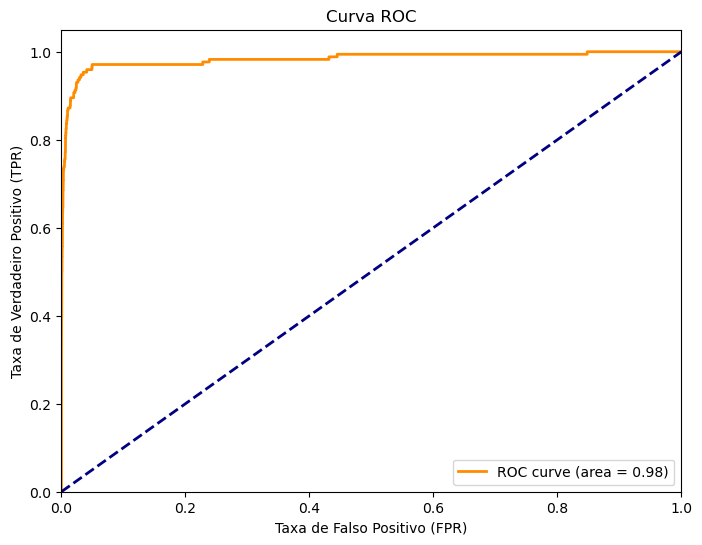

In [28]:
params = {
    'bootstrap': True,
    'criterion': 'entropy',
    'max_depth': 11,
    'max_features': 5,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 410
}

# Criar o classificador Random Forest
model = RandomForestClassifier(**params, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Prever as probabilidades no conjunto de teste
y_prob = model.predict_proba(X_val)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Encontrar o threshold ótimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Threshold ótimo: {optimal_threshold}')

Threshold ótimo: 0.02055262831075027


### Dados finais de previsao

In [47]:
present_year[present_year.columns.difference(['class'])] = present_year[present_year.columns.difference(['class'])].astype(float)
present_year = present_year[columns_to_keep]

X_real = present_year.drop(columns=['class'], axis=1)  # Preditores
y_real = le.fit_transform(present_year['class'])  # Variável resposta codificada

y_pred = model.predict_proba(X_real)[:, 1]
y_pred_binary = (y_pred > optimal_threshold).astype(int)

  Métrica    Valor
 Accuracy 0.949562
  ROC-AUC 0.963765
Precision 0.314751
 F1-Score 0.476314


In [48]:
conf_matrix = confusion_matrix(y_real, y_pred_binary)

# Exibe a matriz de confusão de forma mais legível
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(confusion_df)

Matriz de Confusão:
          Predicted 0  Predicted 1
Actual 0        14826          799
Actual 1            8          367


In [50]:
tempdf = pd.DataFrame({'Real':y_real,'Previsto':y_pred_binary})

tempdf['Custo'] = 0  # Inicializa a coluna 'Custo'

# Aplicar as condições e calcular o custo
tempdf.loc[(tempdf['Real'] == 0) & (tempdf['Previsto'] == 1), 'Custo'] = 10
tempdf.loc[(tempdf['Real'] == 1) & (tempdf['Previsto'] == 1), 'Custo'] = 25
tempdf.loc[(tempdf['Real'] == 1) & (tempdf['Previsto'] == 0), 'Custo'] = 500

# Calcular o custo total
custo_total = tempdf['Custo'].sum()

In [51]:
# Calcular as métricas com o threshold ajustado
accuracy = accuracy_score(y_real, y_pred_binary)
roc_auc = roc_auc_score(y_real, y_pred_binary)
precision = precision_score(y_real, y_pred_binary)
f1 = f1_score(y_real, y_pred_binary)

# Criar um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'ROC-AUC', 'Precision', 'F1-Score', 'Custo de Manutenção'],
    'Valor': [accuracy, roc_auc, precision, f1,custo_total]
})
print(metrics_df.to_string(index=False))

            Métrica        Valor
           Accuracy     0.949562
            ROC-AUC     0.963765
          Precision     0.314751
           F1-Score     0.476314
Custo de Manutenção 21165.000000


### Analise de Variaveis de impacto

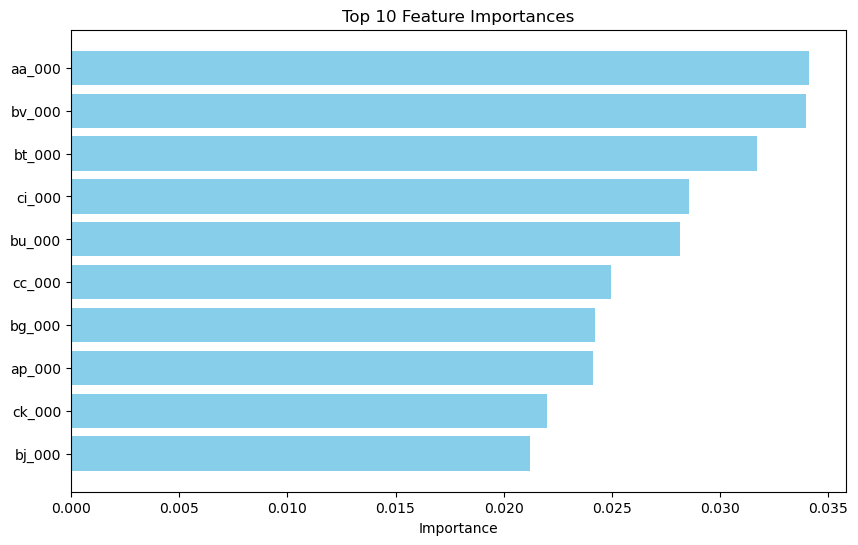

  Feature  Importance
0  aa_000    0.034126
1  bv_000    0.033969
2  bt_000    0.031707
3  ci_000    0.028554
4  bu_000    0.028131
5  cc_000    0.024950
6  bg_000    0.024222
7  ap_000    0.024144
8  ck_000    0.022021
9  bj_000    0.021208


In [56]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Seleciona as 10 mais importantes
top_features = feature_importances.head(10)

# Plot das feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

print(top_features)

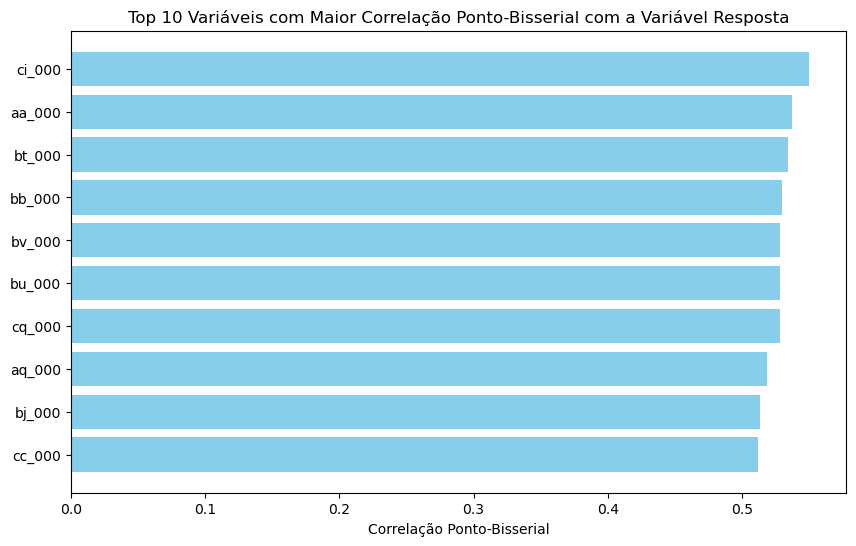

ci_000: 0.5500485911374812
aa_000: 0.5369783925131331
bt_000: 0.5339637421729146
bb_000: 0.5295008094673576
bv_000: 0.5280560327241699
bu_000: 0.5280560084910475
cq_000: 0.5280559918818959
aq_000: 0.5188414060228823
bj_000: 0.5134648500474254
cc_000: 0.5118862485909568


In [65]:
# Calcular correlação ponto-bisserial para todas as variáveis contínuas
correlations = {}
for col in df_train.columns:
    if df_train[col].dtype != 'object' and col != 'class_encoded':  # Selecionar apenas variáveis numéricas
        corr, _ = pointbiserialr(df_train[col], df_train['class_encoded'])
        correlations[col] = abs(corr)  # Armazenar o valor absoluto da correlação

# Ordenar as variáveis pelo valor absoluto da correlação ponto-bisserial (em ordem decrescente)
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Separar os nomes das variáveis e seus valores de correlação
variables = [var for var, corr in sorted_correlations]
corrs = [corr for var, corr in sorted_correlations]

# Plotar gráfico de barras das correlações
plt.figure(figsize=(10, 6))
plt.barh(variables[:10], corrs[:10], color='skyblue')
plt.xlabel('Correlação Ponto-Bisserial')
plt.title('Top 10 Variáveis com Maior Correlação Ponto-Bisserial com a Variável Resposta')
plt.gca().invert_yaxis()  # Inverter a ordem das variáveis para as maiores correlações no topo
plt.show()

top_variables = sorted_correlations[:10]
for var, corr in top_variables:
    print(f"{var}: {corr}")

### Conclusao e Proximos passos

#### Conclusão da Análise das Variáveis Impactantes para Defeitos no Sistema de Ar de Caminhões

Após analisar as variáveis mais impactantes para o modelo e considerar as correlações ponto-bisserial com os maiores valores (próximos de 1, indicando forte impacto na ocorrência do evento codificado como 1, que pode ser defeito no sistema de ar do caminhão), podemos inferir o seguinte:

- **Não há uma única variável de extremo impacto** que isoladamente determine se o caminhão apresentará defeitos no sistema de ar. Em vez disso, várias variáveis contribuem de forma combinada para a predição do defeito.

- As variáveis **aa_000, bv_000, bt_000, ci_000 e bu_000** demonstram correlações ponto-bisserial acima de 0,5 com o evento de interesse (defeito no sistema de ar do caminhão) e são importantes para a tomada de decisão do modelo. Isso sugere que essas variáveis são importantes para a análise e podem oferecer insights sobre o estado desse sistema.

- **Recomenda-se observar essas variáveis** de forma mais detalhada durante a análise do sistema de ar do caminhão. Investigar padrões, comportamentos anômalos ou mudanças nessas variáveis pode fornecer indicativos precoces de potenciais problemas no sistema de ar, permitindo ações corretivas proativas.

- **A combinação de várias variáveis** (e não apenas uma) é essencial para uma análise robusta e preditiva. Ao monitorar essas variáveis em conjunto, é possível obter uma visão mais holística e precisa da condição do sistema de ar do caminhão. Num proximo passo seria interessante usar tecnicas de estatistica multivariada para analisar essas variaveis em conjunto, reduzindo a dimensionalidade do modelo e ajudando na interpretação de resultados como a correlação.

Essas conclusões ajudam a direcionar a atenção para áreas específicas que merecem mais investigação e monitoramento, visando melhorar a eficiência e a confiabilidade do sistema de ar de caminhões.
